In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#MELISSA'S PATH
path = "/content/drive/MyDrive/DSCI532/project/"

#path = "/content/drive/MyDrive/ [INSERT THE FOLDER IN YOUR DRIVE YOU'RE WORKING OUT FROM] /"
#Example:
##path = "/content/drive/MyDrive/DSCI550/Dataset/"

In [ ]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
#!pip install --upgrade gensim ##the version of orginal kept giving me errors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Loading OG Dataset
with open(path + "2023-03-27-wapo-db.csv", encoding="latin1", errors='ignore') as f:
  OG_wapo_data = pd.read_csv(f)

In [ ]:
#Save df as new variable
wapo_data = OG_wapo_data
#View Data
wapo_data.head()

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


In [ ]:
#Counting NAs
nans = wapo_data.isna().sum()
print ("detailed nans per column:\n", nans)
totalcount_nans = wapo_data.isna().sum().sum()
print ("total nans:", totalcount_nans)

detailed nans per column:
 date                              0
name                            499
age                             539
gender                           35
armed                           210
race                              0
city                             14
state                             0
flee                           1051
body_camera                       0
signs_of_mental_illness           0
police_departments_involved       0
dtype: int64
total nans: 2348


In [ ]:
#Checking the datatypes of each column
print (wapo_data.dtypes)

date                            object
name                            object
age                            float64
gender                          object
armed                           object
race                            object
city                            object
state                           object
flee                            object
body_camera                       bool
signs_of_mental_illness           bool
police_departments_involved     object
dtype: object


In [ ]:
#Getting count of how many deaths per year
#First create new time columns "year" + "month_year"

# convert the 'date' column to datetime format
wapo_data['date'] = pd.to_datetime(wapo_data['date'])

# create a new 'year' column that extracts the year from the 'date' column
wapo_data['year'] = wapo_data['date'].dt.year

# create a new 'month_year' column that extracts the month and year from the 'date' column
wapo_data['month_year'] = wapo_data['date'].dt.strftime('%m-%Y')

#reorganize columns so that "year" + "month_year" column are not at the end of df
wapo_data = wapo_data[['date','year', 'month_year', 'name', 'age', 'gender', 'armed', 'race', 'city', 'state', 'flee', 'body_camera', 'signs_of_mental_illness', 'police_departments_involved']]


In [ ]:
#view new df
wapo_data.head()

,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


In [ ]:
#Checking the datatypes of each column
print (wapo_data.dtypes)

date                           datetime64[ns]
year                                    int64
month_year                             object
name                                   object
age                                   float64
gender                                 object
armed                                  object
race                                   object
city                                   object
state                                  object
flee                                   object
body_camera                              bool
signs_of_mental_illness                  bool
police_departments_involved            object
dtype: object


   year  death_count
4  2015          995
7  2016          958
6  2017          983
5  2018          992
3  2019          997
2  2020         1019
1  2021         1048
0  2022         1096
8  2023          223


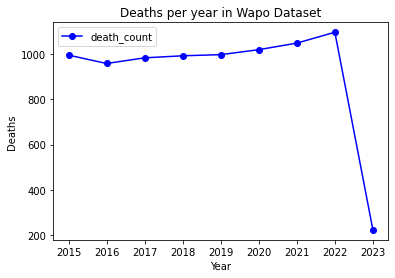

In [ ]:
#Make line graph - based on how many deaths per year

#Counting how much many deaths their were per year
deaths_per_year_count = wapo_data['year'].value_counts()

#view deaths_per_year_count
# print (deaths_per_year_count)
# print (type(deaths_per_year_count))

# move index values to a column
deaths_per_year_count = deaths_per_year_count.reset_index(drop=False)
# print (type (deaths_per_year_count))
# print ( (deaths_per_year_count))

#renaming columns of df
dpy_df = deaths_per_year_count.rename(columns={'index': 'year', 'year': "death_count"})
#print (dpy_df)

#sorting by descending order
dpy_df_sorted = dpy_df.sort_values(by = 'year', ascending = True)
print (dpy_df_sorted )

#create a line plot of the value counts
dpy_df_sorted.plot(x = 'year', y = 'death_count', kind='line', color='blue', marker='o')

#add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Deaths per year in Wapo Dataset')

#display the plot
plt.show()


   month_year  death_count
79 2015-01-01           76
74 2015-02-01           77
24 2015-03-01           92
45 2015-04-01           84
88 2015-05-01           72
..        ...          ...
21 2022-11-01           93
19 2022-12-01           93
7  2023-01-01          100
68 2023-02-01           77
98 2023-03-01           46

[99 rows x 2 columns]


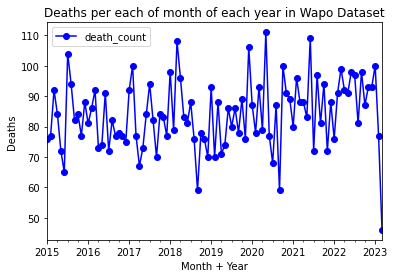

In [ ]:
#Make line graph - based on how many deaths per month_year column values

#Counting how much many deaths their were per year
deaths_per_monthyear_count = wapo_data['month_year'].value_counts()

#view deaths_per_monthyear_count
#print (deaths_per_monthyear_count)
# # print (type(deaths_per_year_count))

#move index values to a column
deaths_per_monthyear_count = deaths_per_monthyear_count.reset_index(drop=False)
# # print (type (deaths_per_year_count))
# #print (deaths_per_monthyear_count)

#renaming columns of df
dpmy_df = deaths_per_monthyear_count.rename(columns={'index': 'month_year', 'month_year': "death_count"})
#print (dpmy_df)
#print (type(dpmy_df))

#sorting by descending order
dpmy_df['month_year'] = pd.to_datetime(dpmy_df['month_year'])
dpmy_df_sorted = dpmy_df.sort_values(by='month_year')
print (dpmy_df_sorted)
#print (type(dpmy_df_sorted))

# #PENDING - NEED to FIGURE OUT HOW TO DROP THE DAY FROM MONTH_YEAR COLUMN
# dpmy_df_sorted ['month_year_new'] = dpmy_df_sorted ['month_year'].dt.strftime('%m-%Y')
# print (dmpy_df_sorted)


#create a line plot of the value counts
dpmy_df_sorted.plot(x = 'month_year', y = 'death_count', kind='line', color='blue', marker='o')

#add labels and title to the plot
plt.xlabel('Month + Year')
plt.ylabel('Deaths')
plt.title('Deaths per each of month of each year in Wapo Dataset')

#PENDING: adjusting figure size
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(dpmy_df_sorted)))

#display the plot
plt.show()

In [ ]:
#Getting count of how many deaths were MI (mental illness) related for the whole dataset
mi_overall_count = wapo_data['signs_of_mental_illness'].value_counts()
print ("Overall count of how many times mental illness was present:\n", mi_overall_count)

Overall count of how many times mental illness was present:
 False    6578
True     1733
Name: signs_of_mental_illness, dtype: int64


    signs_of_mental_illness  year  count
0                     False  2015    735
1                     False  2016    710
2                     False  2017    745
3                     False  2018    772
4                     False  2019    782
5                     False  2020    800
6                     False  2021    900
7                     False  2022    951
8                     False  2023    183
9                      True  2015    260
10                     True  2016    248
11                     True  2017    238
12                     True  2018    220
13                     True  2019    215
14                     True  2020    219
15                     True  2021    148
16                     True  2022    145
17                     True  2023     40


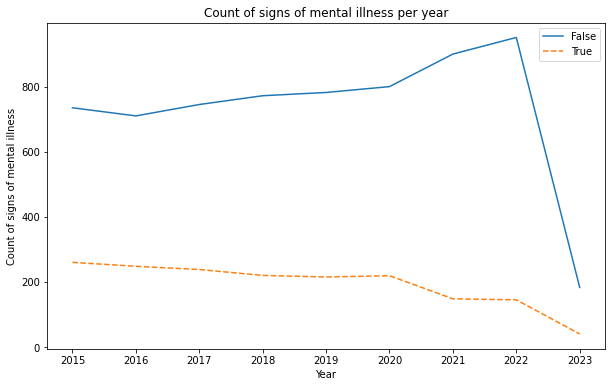

In [ ]:
#Getting count of how many deaths were MI (mental illness) related per year
mi_signs_per_year = wapo_data.groupby(['signs_of_mental_illness', 'year']).size()
#print ("Count of signs of MI_per_year:/n", mi_signs_per_year)
#print (type(mi_signs_per_year))

#Movie the boolean count values of MI for each year into a df
mi_per_year_count = mi_signs_per_year.reset_index(drop=False)

#renaming columns of df
mi_df = mi_per_year_count.rename(columns={'index': 'month_year', 'month_year': "death_count", 0: "count"})
print ((mi_df))

#Plotting double line graph
# pivot the dataframe to get the two columns for each sign of mental illness
mi_double_plot = mi_df.pivot(index='year', columns='signs_of_mental_illness', values='count')

# plot the double line graph
mi_double_plot.plot(kind='line', style=['-', '--'], figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count of signs of mental illness')
plt.title('Count of signs of mental illness per year')
plt.legend(['False', 'True'])
plt.show()

#Deciding what to do with the NANS/Text for report

In [ ]:
# Drop data for 2023
wapo_data.drop(wapo_data[wapo_data['year'] == 2023].index, inplace=True)
#Double count to make sure 2023 data is gone
deaths_yearly_2022 = wapo_data['year'].value_counts()
print (deaths_yearly_2022)


2022    1096
2021    1048
2020    1019
2019     997
2015     995
2018     992
2017     983
2016     958
Name: year, dtype: int64


<ipython-input-15-978a99b7eeea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wapo_data.drop(wapo_data[wapo_data['year'] == 2023].index, inplace=True)


In [ ]:
#For all values under "name" column with missing values, replace with "Unknown"
wapo_data['name'] = wapo_data['name'].fillna('Unknown')
#Double check nan count
nans_name_check = wapo_data.isna().sum()
print (nans_name_check)

date                             0
year                             0
month_year                       0
name                             0
age                            502
gender                          30
armed                          210
race                             0
city                             6
state                            0
flee                           984
body_camera                      0
signs_of_mental_illness          0
police_departments_involved      0
dtype: int64


<ipython-input-16-b4cfeb6d9505>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wapo_data['name'] = wapo_data['name'].fillna('Unknown')


In [ ]:
#Viewing the missing gender to decide what to do
# create a boolean mask of NaN values in the column
mask = wapo_data['gender'].isna()

# use the mask to filter the rows
rows_with_nans = wapo_data[mask]

print (rows_with_nans)

           date  year month_year                          name   age gender  \
2655 2017-09-16  2017    09-2017                 Scout Schultz  21.0    NaN   
6877 2021-11-20  2021    11-2021                       Unknown   NaN    NaN   
6903 2021-11-30  2021    11-2021                       Unknown   NaN    NaN   
7036 2022-01-18  2022    01-2022                       Unknown   NaN    NaN   
7282 2022-04-06  2022    04-2022                       Unknown   NaN    NaN   
7319 2022-04-18  2022    04-2022      Larry Marquail Mixon III  19.0    NaN   
7338 2022-04-26  2022    04-2022                       Unknown   NaN    NaN   
7342 2022-04-27  2022    04-2022                       Unknown   NaN    NaN   
7352 2022-05-01  2022    05-2022                       Unknown   NaN    NaN   
7457 2022-06-03  2022    06-2022               Kevin Colindres  32.0    NaN   
7461 2022-06-04  2022    06-2022  Joseph Robert Henry Thompson  66.0    NaN   
7469 2022-06-08  2022    06-2022                    

In [ ]:
#Exploring Gender types
gender_count = wapo_data['gender'].value_counts()
print (gender_count)

male      7698
female     360
Name: gender, dtype: int64


In [ ]:
#Gender nans: dropping if gender = nan
#wapo_data = wapo_data.dropna(subset=['gender'])
wapo_data['gender'] = wapo_data['gender'].fillna('not_reported')
#Double check nan count
nans_gen_check = wapo_data.isna().sum()
print (nans_gen_check)

<ipython-input-19-3f9a34b93e7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wapo_data['gender'] = wapo_data['gender'].fillna('not_reported')


date                             0
year                             0
month_year                       0
name                             0
age                            502
gender                           0
armed                          210
race                             0
city                             6
state                            0
flee                           984
body_camera                      0
signs_of_mental_illness          0
police_departments_involved      0
dtype: int64


In [ ]:
#Exploring types of responses for armed
armed_count = wapo_data['armed'].value_counts()
print (armed_count)

gun                          4665
knife                        1374
unarmed                       480
vehicle                       288
undetermined                  284
replica                       275
blunt_object                  202
unknown                       125
other                          83
gun,vehicle                    37
gun,knife                      35
vehicle,gun                    15
other,gun                       3
knife,vehicle                   3
blunt_object,knife              2
blunt_object,blunt_object       2
knife,blunt_object              2
replica,vehicle                 1
vehicle,knife,other             1
other,blunt_object,knife        1
Name: armed, dtype: int64


In [ ]:
#Armed nans: how to handle armed nans
wapo_data['armed'] = wapo_data['armed'].fillna('not_reported')
#Double check nan count
nans_armed_check = wapo_data.isna().sum()
print (nans_armed_check)

date                             0
year                             0
month_year                       0
name                             0
age                            502
gender                           0
armed                            0
race                             0
city                             6
state                            0
flee                           984
body_camera                      0
signs_of_mental_illness          0
police_departments_involved      0
dtype: int64


<ipython-input-21-b661228b7867>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wapo_data['armed'] = wapo_data['armed'].fillna('not_reported')


In [ ]:
#Exploring types of responses for armed
armed_count = wapo_data['armed'].value_counts()
print (armed_count)

gun                          4665
knife                        1374
unarmed                       480
vehicle                       288
undetermined                  284
replica                       275
not_reported                  210
blunt_object                  202
unknown                       125
other                          83
gun,vehicle                    37
gun,knife                      35
vehicle,gun                    15
other,gun                       3
knife,vehicle                   3
blunt_object,blunt_object       2
knife,blunt_object              2
blunt_object,knife              2
replica,vehicle                 1
vehicle,knife,other             1
other,blunt_object,knife        1
Name: armed, dtype: int64


In [ ]:
#exploring the values for flee column
flee_count = wapo_data['flee'].value_counts()
print (flee_count)

not      4463
car      1301
foot     1040
other     300
Name: flee, dtype: int64


In [ ]:
#Flee nans: how to handle flee nans
wapo_data['flee'] = wapo_data['flee'].fillna('not_reported')
#Double check nan count
nans_flee_check = wapo_data.isna().sum()
print (nans_flee_check)

<ipython-input-24-798566738d9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wapo_data['flee'] = wapo_data['flee'].fillna('not_reported')


date                             0
year                             0
month_year                       0
name                             0
age                            502
gender                           0
armed                            0
race                             0
city                             6
state                            0
flee                             0
body_camera                      0
signs_of_mental_illness          0
police_departments_involved      0
dtype: int64


In [ ]:
#Checking count
flee_count = wapo_data['flee'].value_counts()
print (flee_count)

not             4463
car             1301
foot            1040
not_reported     984
other            300
Name: flee, dtype: int64


In [ ]:
#City nans: how to handle city nans
wapo_data['city'] = wapo_data['city'].fillna('not_reported')
#Double check nan count
nans_city_check = wapo_data.isna().sum()
print (nans_city_check)

date                             0
year                             0
month_year                       0
name                             0
age                            502
gender                           0
armed                            0
race                             0
city                             0
state                            0
flee                             0
body_camera                      0
signs_of_mental_illness          0
police_departments_involved      0
dtype: int64


<ipython-input-26-18d0e034e1d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wapo_data['city'] = wapo_data['city'].fillna('not_reported')


Mean: 37.220537832849985
Median: 27.5
     age  age_count
80   2.0          1
73   6.0          2
78   8.0          1
75  12.0          2
70  13.0          3
..   ...        ...
74  86.0          2
71  88.0          2
77  89.0          1
72  91.0          2
79  92.0          1

[81 rows x 2 columns]


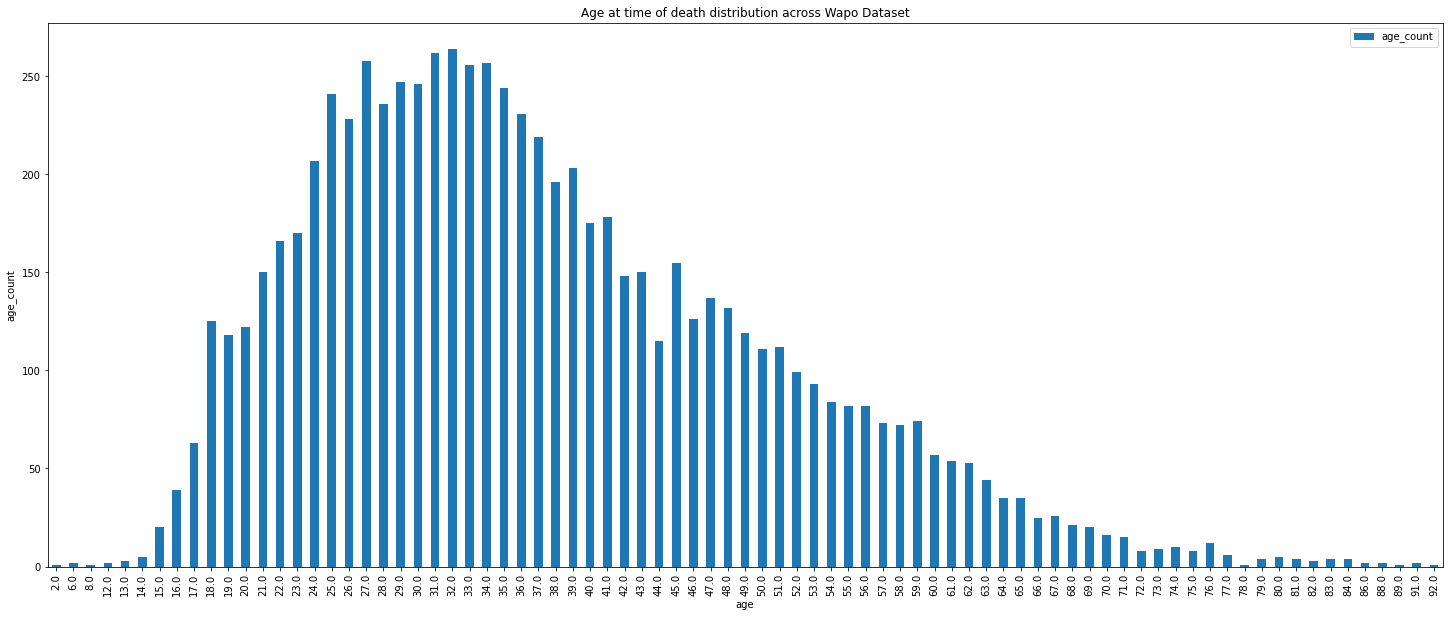

<Figure size 1440x1584 with 0 Axes>

In [ ]:
#Exploring the age variable

age = wapo_data['age']

n = len(age)

#Getting mean
# mean = sum(age) / n
# print("Mean:", mean)
mean = age.mean(skipna=True)
print("Mean:", mean)

#Getting median
data_sorted = sorted(age)
if n % 2 == 0:
    median = (data_sorted[n//2-1] + data_sorted[n//2]) / 2
else:
    median = data_sorted[n//2]
print("Median:", median)

#Checking age appearances
age_count = age.value_counts()
#print (age_count)

#Plotting age on a bar graph
age_count = age_count.reset_index(drop=False)
#print (age_count)

# #renaming columns of df
age_df = age_count.rename(columns={'index': 'age', 'age': 'age_count'})
#print ((age_df))

#sort age df
age_df_sorted = age_df.sort_values(by='age')
print (age_df_sorted)

# Plotting a bar chart
age_df_sorted.plot.bar(x='age', y='age_count', rot=90, figsize=(25, 10))


# Changing size of x ticks
plt.xticks(fontsize=10)

# Add labels and title
plt.xlabel('age')
plt.ylabel('age_count')
plt.title('Age at time of death distribution across Wapo Dataset')

# Create a larger figure
plt.figure(figsize=(20,22))

# Save the chart as a PNG file
plt.savefig('DD_barchart.png')

# Display the chart
plt.show()
#plt.tight_layout()

In [ ]:
####Handling Age: how to handle age nans
#deciding between using mean and median to fill nans
#since the distribution is not that even, using median


#Replace nans with median
wapo_data.fillna(median, inplace=True)

# Calculate the new mean
new_mean = wapo_data['age'].mean()
print("New Mean:", mean)

#Double check nan count
nans_age_check = wapo_data.isna().sum()
print (nans_age_check)

New Mean: 37.220537832849985
date                           0
year                           0
month_year                     0
name                           0
age                            0
gender                         0
armed                          0
race                           0
city                           0
state                          0
flee                           0
body_camera                    0
signs_of_mental_illness        0
police_departments_involved    0
dtype: int64


<ipython-input-74-ee5bb3e754a1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wapo_data.fillna(median, inplace=True)


#Text for report about how nans were handled


Some of the most important variables were not missing any values. These variables included date, race, state, and signs of mental illness.


There are 499 entires with no reported name. People's names do not matter for this analysis. All NANs with "Unknown".



Since there is no full dataset available for the year 2023 as it is still currently this year, all 2023 data was dropped so that it would not impact the analysis.

In order not to introduce bias into the analysis, I have decided to keep entries where gender is not reported but fill in those missing values with "not reported. Although there were only 35 entries, I did not want to assume a person's gender based off their name. It is also important to note that 28 out of the 35 entries missing reported gender did not have names reported.

To handle all the missing values under the armed and flee variable, they were all filled in with "not reported"





In [ ]:
###RUN LAST AFTER MISSING AGE VALUES ARE FILLED IN/DEALT WITH
#Outputting cleaned data set into new csv
### NOTE: path variable is your own path defined above
# wapo_data.to_csv(path + "no_nan_wapo_data")

###EXAMPLE:
### wapo_data.to_csv(path + "INSERT NAME HERE.csv")